In [18]:
from __future__ import print_function

import numpy as np
from scipy import stats
import pylab as pl

import os
import json
import pandas as pd

import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

import matplotlib
import matplotlib.pyplot as pl

%matplotlib nbagg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
# get MTA rides data from fb55 repo

In [20]:
# !wget "https://github.com/fedhere/PUI2017_fb55/raw/master/HW10_fb55/MTA_Fare.npy" # get data

In [21]:
mtaRides = np.load("MTA_Fare.npy")

In [34]:
mtaRides.shape

(600, 23, 194)

In [44]:
mtaRides.flatten().shape

(2677200,)

In [45]:
mtaRides.reshape(13800, 194).shape

(13800, 194)

In [46]:
mtaFlat = mtaRides.flatten().shape

In [47]:
mtaRides_St = mtaRides.reshape(13800, 194).shape

In [28]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

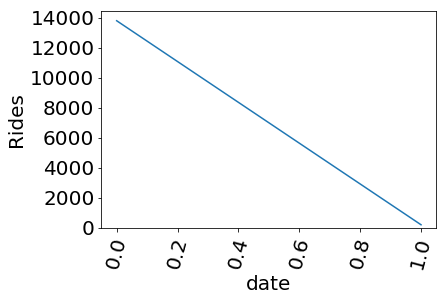

In [52]:
ax = plt.plot(mtaRides_St)

pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.xlabel("date", fontsize=20)
pl.ylabel("Rides", fontsize=20)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


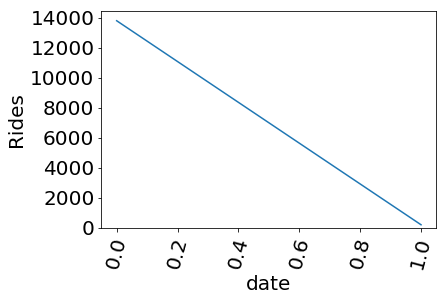

In [51]:
ax = plt.plot(mtaRides_St)

pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.xlabel("date", fontsize=20)
pl.ylabel("Rides", fontsize=20)



In [31]:
np.nanmean(mtaRides)

2157.8262034961899

In [32]:
np.nansum(mtaRides)

5776932312

In [ ]:
pd.date_range()

In [50]:
d.to_datetime(mtaRides.Date).shape

NameError: name 'd' is not defined

In [48]:
mta_allsum = np.nansum(mtaRides, axis=0)
print (mta_allsum.shape)


(23, 194)


In [49]:
mta_allsum = np.nansum(mtaRides, axis=1)
print (mta_allsum.shape)

(600, 194)


In [ ]:
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].mean()))
print ("stdev deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].std()))
thresholds = [FSNYts['FDNY_deaths'].mean() + 3 * FSNYts['FDNY_deaths'].std(), 
              FSNYts['FDNY_deaths'].mean() - 3 * FSNYts['FDNY_deaths'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(FSNYts.index), "-", 
       FSNYts.iloc[FSNYts.index == min(FSNYts.index)].FDNY_deaths.values[0], "deaths")

In [ ]:
# viewed Github repo sbg389

In [55]:
print (mtaRides.shape)

# Basic Data Cleanup (Convert to float and replace the -1 with NaN)

mtaRides = mtaRides.astype(numpy.float, copy = False)
mtaRides[mtaRides == -1] = np.nan

# Create an array with the redetype
ridetype = ['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud']

# Create a date range for the weeks
rng = pd.date_range('5/21/2010', periods=194, freq='W')

(600, 23, 194)


In [57]:
print ("Using nanmean on mtarides: " + str (np.nanmean(mtaRides)))
print ("Using regular mean on mtarides: " + str (np.mean(mtaRides)))

Using nanmean on mtarides: 2849.41627865
Using regular mean on mtarides: nan


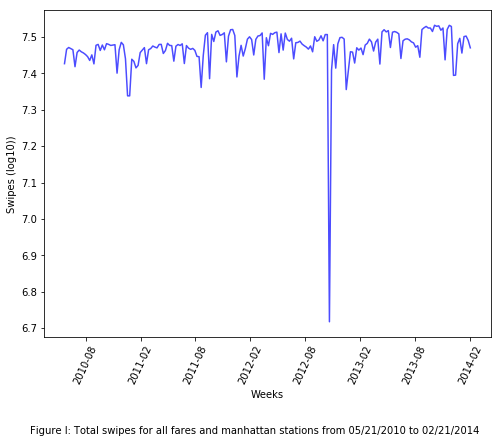

In [59]:
# Sum the timeseries for all stations and fares (we are looking fpr an event that we know is common to all 
# time series)

mtaRides_allStations = np.nansum(mtaRides, axis = 0)
# print (mtarides_allStations.shape)

mtaRides_allStationsAndFares = np.nansum(mtaRides_allStations, axis = 0)
# print (mtarides_allStationsAndFares.shape)

pl.figure(figsize=(8, 6))
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10))") 

# Plot sum of all rides (using log10 on the y axis to improve visibility)
pl.plot(rng, np.log10(mtaRides_allStationsAndFares),'b', alpha=0.7)
pl.xticks(rotation='65')
pl.legend(loc='upper left')

figtext(0.1,-.1,"Figure I: Total swipes for all fares and manhattan stations from 05/21/2010 to 02/21/2014")

In [60]:
# Identifying the event: take the mean and standard deviation 
# and find points that deviate from the mean by more than 3 standard deviations
# bellow code snippet from https://github.com/fedhere/UInotebooks/blob/master/timeseries/FDNYdeaths.ipynb

print ("mean swipes by week {:.2f}".format(np.nanmean(mtaRides_allStationsAndFares)))
print ("stdev swipes by week {:.2f}".format(np.nanstd(mtaRides_allStationsAndFares)))

thresholds = [np.nanmean(mtaRides_allStationsAndFares) + 3 * np.nanstd(mtaRides_allStationsAndFares), 
              np.nanmean(mtaRides_allStationsAndFares) - 3 * np.nanstd(mtaRides_allStationsAndFares)]

print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(rng))

mean swipes by week 29781349.87
stdev swipes by week 2983960.42
3-sigma thresholds 38733231.14 20829468.61
earliest datapoint 2010-05-23 00:00:00


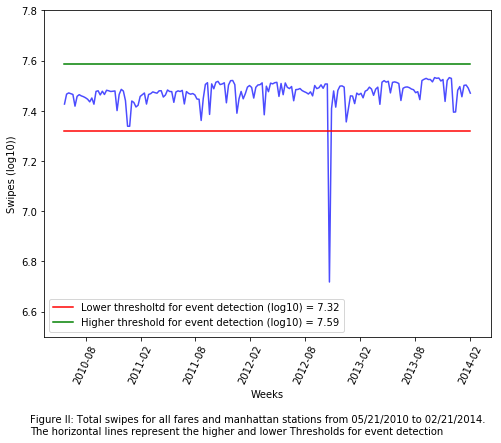

In [61]:
pl.figure(figsize=(8, 6))
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10))") 
pl.ylim(6.5,7.8)

# Plot sum of all rides (using log10 on the y axis to improve visibility)
pl.plot(rng, np.log10(mtaRides_allStationsAndFares),'b', alpha=0.7)
pl.xticks(rotation='65')

# Plot the lower Thereshold for the event detection
pl.plot((min(rng), max(rng)),(np.log10(thresholds[1]),np.log10(thresholds[1])), color='r',
       label='Lower thresholtd for event detection (log10) = %.2f' % np.log10(thresholds[1]))

# Plot the higher Thereshold for the event detection
pl.plot((min(rng), max(rng)),(np.log10(thresholds[0]),np.log10(thresholds[0])), color='g',
        label='Higher threshold for event detection (log10) = %.2f' % np.log10(thresholds[0]))

figtext(0.1,-.1,"Figure II: Total swipes for all fares and manhattan stations from 05/21/2010 to 02/21/2014. \n"
 "The horizontal lines represent the higher and lower Thresholds for event detection")
pl.legend(loc='lower left')

In [63]:
# Get the date for the event and try to explain what it might be related to
print (rng[np.where(mtaRides_allStationsAndFares < 20829468.61)])

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None)


In [64]:
# Sum the time series for all stations (we are going to be evaluating the time series for each of the
# different types of fares)

mtaRides_allStations = np.nansum(mtaRides, axis = 0)
# print (mtarides_allStations.shape)

#for n in range(0,len(mtarides_allStations)):
#    print ((np.min(mtarides_allStations[n]))>0)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:37: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


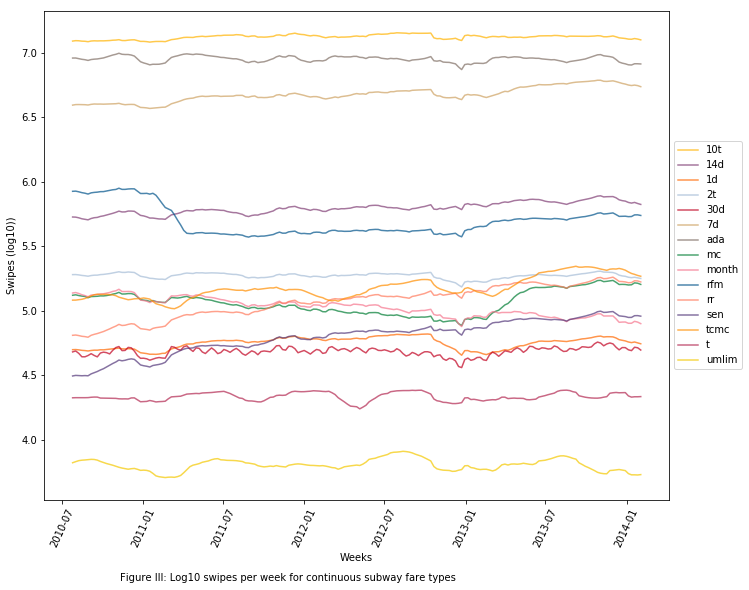

In [65]:
# Visually explore the data (plot all the relevant time series

#print (np.nanmin(np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[0], 10))))

# Color sequence from FBB stationary notebook sample
# https://github.com/fedhere/UInotebooks/blob/master/timeseries/stationarity.ipynb
# Will create a function to plot iterating through the color sequence for the different fares

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

seqlen = len(kelly_colors_hex)

def plot_rtype(range, rtype, color):
    '''Function to plot the time series cycling through color sequence'''
    pl.plot(range, np.log10(pd.stats.moments.rolling_mean(mtaRides_allStations[rtype], 10)), color=color, 
           alpha = .7, label = ridetype[rtype])
    
pl.figure(figsize=(14, 9))
pl.xlabel("Weeks")
pl.ylabel("Swipes (log10))") 
ax = plt.subplot(111)
    
curr_col = 0

# Create a dictionary to store the begnings and ends of the time series
# The key will be the code for the fare type and the values a tuple
# With the position on the original array and the ration value
# E.G. {'2t': (3, 0.933803359955935)}

fareSeriesRatios = {}

for n in range(0,len(mtaRides_allStations)):
    
    # Check if the time series is continuous (doesnt have weeks with 0 rides)
    # This seems to us a good criteria to rule out upfront things that wont
    # Steaditly increase or decrease
    
    if ((np.min(mtaRides_allStations[n])) > 0):
        
    # Plot sum of all rides (using log10 on the y axis to improve visibility)
        #if ((np.nanmin(np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[n], 10))) > 4) &
        #((np.nanmax(np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[n], 10))) < 6))):
        #pl.plot(rng, np.log10(pd.stats.moments.rolling_mean(mtarides_allStations[n], 10)),
        #alpha=0.7, )
        
        plot_rtype(rng, n, kelly_colors_hex[curr_col])
        curr_col = (curr_col + 1)%seqlen
    
        # Sum all the rides for the begining (first ten weeks)
        # and the end of the series (last ten weeks)
        
        begningSeries = mtaRides_allStations[n,:10].sum()
        endSeries = mtaRides_allStations[n,-10:].sum()
        seriesRatio = endSeries/begningSeries
        fareSeriesRatios[ridetype[n]] = (n,seriesRatio)

pl.xticks(rotation='65')

# Shrink current axis by 20%
# So I can put a legend to the right of the current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

figtext(0.2,-.00001,"Figure III: Log10 swipes per week for continuous subway fare types")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


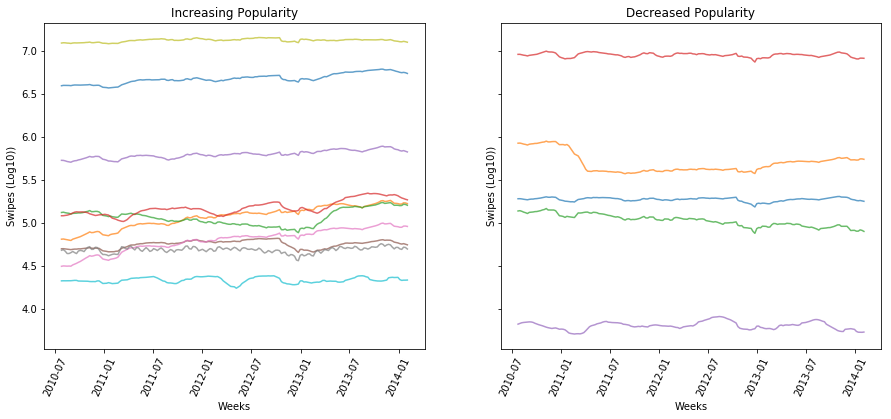

Figure IV: Log10 swipes per week for fares with increasing and decreasing popularity


In [66]:
# If a ridership type popularity has increased, the ratio will be > 1 (ended with more rides that started)
# if it decreased, it will be the oposite. Lets plot them side by side

f, (ax1, ax2) = pl.subplots(1, 2, sharey=True, figsize=(15,6))

for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation='65')
    pl.xlabel("Weeks")
    pl.ylabel("Swipes (Log10))") 
      
ax1.set_title('Increasing Popularity')
ax2.set_title('Decreased Popularity')

for key, value in fareSeriesRatios.iteritems():
    if (fareSeriesRatios[key][1] > 1):
        ax1.plot(rng, np.log10(pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios[key][0]], 10)), 
                 alpha = .7, label = key)
    else:
        ax2.plot(rng, np.log10(pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios[key][0]], 10)), 
                 alpha = .7, label = key)

pl.show()


print ("Figure IV: Log10 swipes per week for fares with increasing and decreasing popularity")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


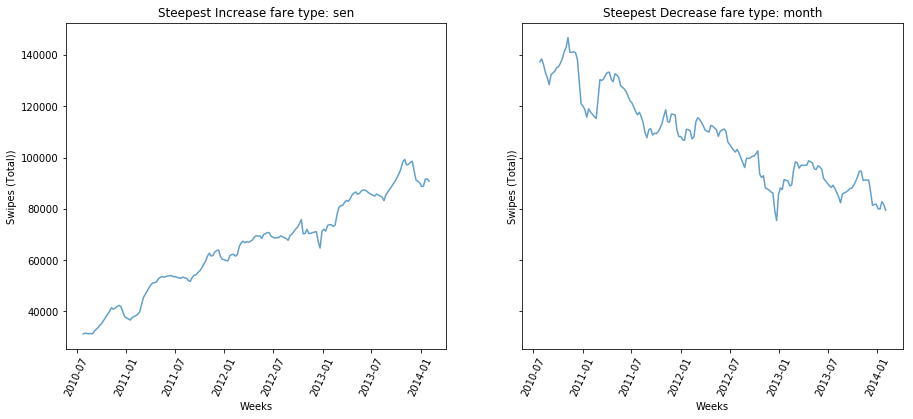

Figure V: Total swipes per week for the steepest increase and decres fares

The fare type with the steepest upware trend is sen, this fare went from an average 
of 31208.6 swipes per week during the first 10 weeks to an average of 90798.2 during the last ten weeks


The fare type with the steepest downard trend is month, this fare went from an average 
of 137296.4 swipes per week during the first 10 weeks to an average of 79456.5 during the last ten weeks


In [67]:
# Getting the min and max values from the fareSeriesRations dictionary
# This will represent the fares with the steepes upward and dowward trends
# Snippet to Get max and min from a dic from stack overflow (http://stackoverflow.com/a/3282871)

downFare =  min(fareSeriesRatios.items(), key=lambda x: x[1][1])
upFare =  max(fareSeriesRatios.items(), key=lambda x: x[1][1])

# Plot both side by side, using absolut values (not log10) with rolling mean for 10 weeks

f, (ax1, ax2) = pl.subplots(1, 2, sharey=True,figsize=(15,6))

for ax in f.axes:
    matplotlib.pyplot.sca(ax)
    pl.xticks(rotation='65')
    pl.xlabel("Weeks")
    pl.ylabel("Swipes (Total))") 

ax1.set_title('Steepest Increase fare type: ' + upFare[0])
ax2.set_title('Steepest Decrease fare type: ' + downFare[0])

ax1.plot(rng, pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios['sen'][0]],10)
         , alpha = .7, label = 'sen')

ax2.plot(rng, pd.stats.moments.rolling_mean(mtaRides_allStations[fareSeriesRatios['month'][0]],10)
        , alpha = .7, label = 'month')

pl.show()

print ("Figure V: Total swipes per week for the steepest increase and decres fares" + '\n')

print ("The fare type with the steepest upware trend is " + upFare[0] + ", this fare went from an average " +
       '\n' + "of " + str(np.average(mtaRides_allStations[ridetype.index(upFare[0])][:10])) + " swipes " +
       "per week during the first 10 weeks to an average of " 
       + str(np.average(mtaRides_allStations[ridetype.index(upFare[0])][-10:])) + " during the last ten weeks")

print ('\n')

print ("The fare type with the steepest downard trend is " + downFare[0] + ", this fare went from an average " +
       '\n' + "of " + str(np.average(mtaRides_allStations[ridetype.index(downFare[0])][:10])) + " swipes " +
       "per week during the first 10 weeks to an average of " 
       + str(np.average(mtaRides_allStations[ridetype.index(downFare[0])][-10:])) + " during the last ten weeks")

In [ ]:
# Trend Analysis

NameError: name 'mtaRides_allStations_power' is not defined

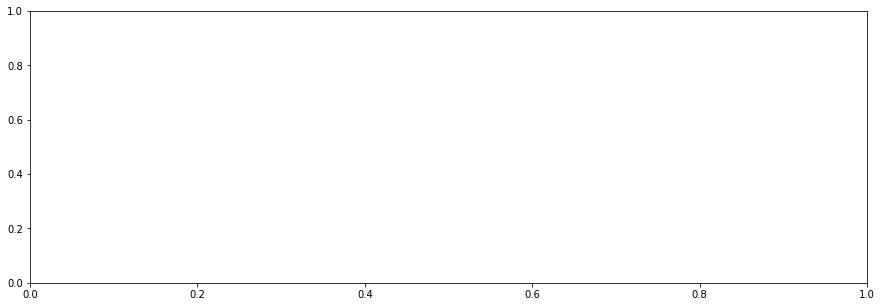

In [70]:
# Will collapse the fare types dimension of the cube (we care about stations here!)
mtaRides_allStations = np.nansum(mtaRides, axis=1)

# Will visually inspect all the stations plotting their power spectrum, excluding the first two elements on the X
# (Frequencies that correspond Infinity and the whole period: "Uninteresting")
# as explained in https://github.com/fedhere/UInotebooks/blob/master/timeseries/fourier.ipynb

N = len(mtaRides_allStations[1])
fig=pl.figure(figsize=(15,5))
ax=fig.add_subplot(111)

# Create a dictionary to store the frequency bin centers in cycles per week (X Axis)
# and the Fourier Transform value (Y) for eac of the stations

mtaRides_allStations_yearPeriodicity = {}

for i in range (len(mtaRides_allStations)):
    f = np.abs(np.fft.rfft(mtaRides_allStations[i]))
    ffreq = np.fft.rfftfreq(N, 1.0)
    mtaRides_allStations_power[i]=(ffreq,f)
    ax.plot(ffreq[2:], (f[2:]), '-')
    mtaRides_allStations_yearPeriodicity[i]=((f[4]))

ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Period (Weeks)", fontsize=15)
pl.ylabel("Power", fontsize=15)

ax.set_title('Power Spectrum for all 600 Subway stations in Manhattan', fontsize=20)